In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing

In [101]:
housing_datasets = fetch_california_housing()

housing_datasets.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [102]:
X = pd.DataFrame(housing_datasets['data'], columns = housing_datasets['feature_names'])
y = pd.DataFrame(housing_datasets['target'], columns = housing_datasets['target_names'])

housing_df = X.join(y)

housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


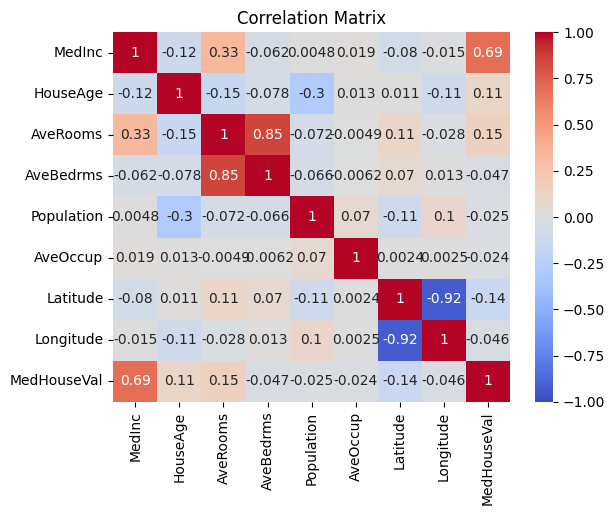

In [103]:
corr_matrix = housing_df.corr()

sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True, vmin = -1, vmax = 1)

plt.title('Correlation Matrix')
plt.show()

In [104]:
housing_selected_df = X[['MedInc']].join(y)

housing_selected_df

,MedInc,MedHouseVal
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422
...,...,...
20635,1.5603,0.781
20636,2.5568,0.771
20637,1.7000,0.923
20638,1.8672,0.847


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 13)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [106]:
reg = LinearRegression()

reg.fit(X_train, y_train)

reg.score(X_test, y_test)

0.6002127972487661

In [107]:
r_reg = Ridge(alpha = 15)

r_reg.fit(X_train_scaled, y_train)

print("Train accuracy: {}".format(r_reg.score(X_train_scaled, y_train)))
print("Test accuracy: {}".format(r_reg.score(X_test_scaled, y_test)))

Train accuracy: 0.6086985432621479
Test accuracy: 0.6002306584720316


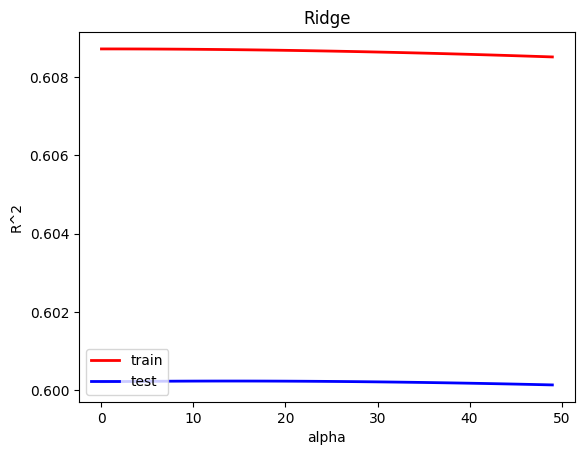

In [108]:
alphas = np.array([])
tr_scores = np.array([])
te_scores = np.array([])

for a in range(0, 50):

    r_reg = Ridge(alpha = a)

    r_reg.fit(X_train_scaled, y_train)

    alphas = np.append(alphas, a)
    tr_scores = np.append(tr_scores, r_reg.score(X_train_scaled, y_train))
    te_scores = np.append(te_scores, r_reg.score(X_test_scaled, y_test))

plt.plot(alphas, tr_scores, label = 'train', color = 'red', linewidth = 2)
plt.plot(alphas, te_scores, label = 'test', color = 'blue', linewidth = 2)

plt.title('Ridge')
plt.legend(loc = 'lower left')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [109]:
l_reg = Lasso(alpha = 0.01, max_iter = 1500)

l_reg.fit(X_train_scaled, y_train)

print("Train accuracy: {}".format(l_reg.score(X_train_scaled, y_train)))
print("Test accuracy: {}".format(l_reg.score(X_test_scaled, y_test)))

Train accuracy: 0.6043469798407555
Test accuracy: 0.595787738258275


C:\Users\94220\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:1152: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\94220\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\94220\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increas

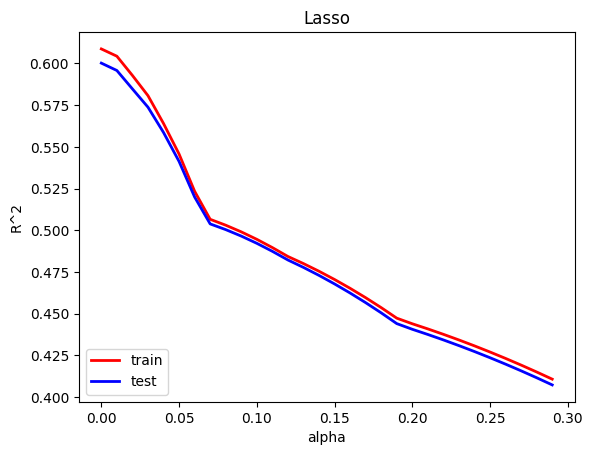

In [110]:
alphas = np.array([])
tr_scores = np.array([])
te_scores = np.array([])

for a in np.arange(0.0, 0.3, 0.01):

    l_reg = Lasso(alpha = a, max_iter = 1500)

    l_reg.fit(X_train_scaled, y_train)

    alphas = np.append(alphas, a)
    tr_scores = np.append(tr_scores, l_reg.score(X_train_scaled, y_train))
    te_scores = np.append(te_scores, l_reg.score(X_test_scaled, y_test))

plt.plot(alphas, tr_scores, label = 'train', color = 'red', linewidth = 2)
plt.plot(alphas, te_scores, label = 'test', color = 'blue', linewidth = 2)

plt.title('Lasso')
plt.legend(loc = 'lower left')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()